Note that this file is identical to "Q-TableFIT5226_new_version.ipynb"

In [2]:
import numpy as np
# Define the Q-table agent
class QTableAgent:
    def __init__(self):
        self.q_table = np.zeros((5, 5, 5, 5, 2, 4))  # Add one extra dimension for reached A or not

    def choose_action(self, state, epsilon):
        # Choose an action based on the epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(self.q_table[state])

        return action

    def update_q_table(self, state, action, next_state, reward, learning_rate, discount_factor, done):
        # Update the Q-table using the Q-learning update rule
        
        max_q_value = 0 if done else np.max(self.q_table[next_state])
    
        self.q_table[state + (action,)] += learning_rate * (reward + discount_factor * max_q_value - self.q_table[state + (action,)])

# Define the grid world environment
class GridWorldEnvironment:
    def __init__(self, n, m):
        self.n = n
        self.m = m
        self.agent_position = (0, 0)  # Start at the top-left corner of the grid world
        self.reached_A = False
        # fixed food source location
        # self.food_source_location = (4, 4)
        # dynamic changing food source location
        self.food_source_location = (np.random.randint(n), np.random.randint(m))
        self.nest_location = (n-1,m-1)
        self.rewards = np.zeros((grid_rows, grid_cols))
        self.rewards[self.food_source_location[0],self.food_source_location[1]] = 10
        self.rewards[self.nest_location[0],self.nest_location[1]] = 50
     
    
    def _reset(self):
        self.agent_position = (0, 0)  # Start at the top-left corner of the grid world
        self.reached_A = False
        #random the location of food source per episode; commands off this line for the fix food source
        self.food_source_location = (np.random.randint(self.n), np.random.randint(self.m))
        self.rewards = np.zeros((grid_rows, grid_cols))
        self.rewards[self.food_source_location[0],self.food_source_location[1]] = 10
        self.rewards[self.nest_location[0],self.nest_location[1]] = 50
      
 
    def get_state(self):

        reached_A_state = 1 if self.reached_A else 0
        return self.agent_position[0], self.agent_position[1], self.food_source_location[0], self.food_source_location[1], reached_A_state

    def check_done(self):
        if self.agent_position == self.nest_location and self.reached_A:
            return True
        else:
            return False
    
    def take_action(self, action):
        row, col = self.agent_position

        # Perform the chosen action and observe the next state and reward
        if action == 0:  # Up
            next_position = (max(row - 1, 0), col)
        elif action == 1:  # Down
            next_position = (min(row + 1, grid_rows - 1), col)
        elif action == 2:  # Left
            next_position = (row, max(col - 1, 0))
        elif action == 3:  # Right
            next_position = (row, min(col + 1, grid_cols - 1))
       
        if self.reached_A == False: 
            if next_position == self.food_source_location:
                self.reached_A = True
                reward = self.rewards[next_position]
            else:
                 reward = -1
        elif self.reached_A and next_position == self.nest_location:
            reward = self.rewards[next_position]
        
        else:
            reward = -1
            
        self.agent_position = next_position
        return reward



In [3]:
def movingAverage(arr, window_size):
    i = 0
    moving_averages = []
    while i < len(arr) - window_size + 1:
        window_average = round(np.sum(arr[i:i+window_size]) / window_size, 2)
        moving_averages.append(window_average)
        i += 1
    return moving_averages

<class 'tuple'>


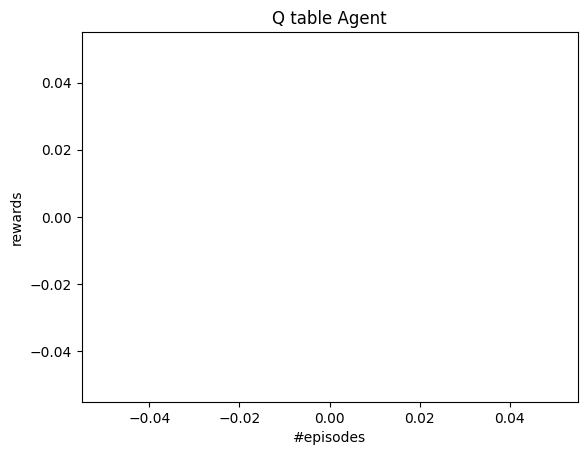

Finished in  0.00043033200000008875  seconds.


In [ ]:
from time import process_time

t = process_time()

# Define the learning parameters
learning_rate = 0.3
discount_factor = 0.98
num_episodes = 50000
max_steps = 100 # this was never used - 100 is good
epsilon_initial = 1.0
epsilon_final = 0.1
epsilon_decay = 0.99995 
# Define the grid world dimensions
grid_rows = 5
grid_cols = 5
# Define the number of actions (up, down, left, right)
num_actions = 4

# Create the Q-table agent and grid world environment
agent = QTableAgent()
environment = GridWorldEnvironment(grid_rows,grid_cols)

reward_total = []
epsilon = epsilon_initial
# Implement the Q-learning algorithm
for episode in range(num_episodes+1):   
    environment._reset()
    number_of_steps = 0
    reward_per_episode =  0
    while number_of_steps<= max_steps and (environment.agent_position != environment.nest_location or environment.reached_A != True):  # Continue until reaching location B     
        # why does this never seem to run into an infinite loop? number_of_steps wasn't tested by Yue
        # Presumably the high and everlasting epsilon lets everyone walk into one of the goals sooner or later
        state = environment.get_state()
        action = agent.choose_action(state, epsilon)
        reward = environment.take_action(action)
        next_state = environment.get_state()
        reward_per_episode += reward
        done = environment.check_done()
        agent.update_q_table(state, action, next_state, reward, learning_rate, discount_factor, done)

        number_of_steps += 1
        
    reward_total.append(reward_per_episode)
    epsilon = np.max([epsilon_final, epsilon*epsilon_decay])
    if (episode%5000==0):
        print(episode, "episodes")

elapsed_time = process_time() - t

import matplotlib.pyplot as plt
plt.plot(movingAverage(reward_total,100))
# Add x and y axis labels
plt.xlabel("#episodes")
plt.ylabel("rewards")
plt.title("Q table Agent")
# Show the plot
plt.show()

agent.q_table.astype('float32').tofile('qTable single agent fast.dat')

print("Finished in ", elapsed_time, " seconds.")